# Titanic - Machine Learning from Disaster
Kaggle -  ML basics
https://www.kaggle.com/competitions/titanic/data


In [42]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# Import preprocessing
from sklearn import preprocessing


import os
# for dirname, _, filenames in os.walk('/Users/shahedkarolia/Library/CloudStorage/OneDrive-Personal/Kaggle1/KG-1'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

## Data Dictionary

[Add dict]

# Import Data


In [25]:
# load data
# load train.csv 
df_train = pd.read_csv("data/train.csv")
# load test.csv
df_test = pd.read_csv("data/test.csv")

# EDA

In [26]:
print(df_train.shape)
df_train.head()

(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [27]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [28]:
df_train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [29]:
df_train.groupby(["Survived", 'Sex'])["PassengerId"].count()

Survived  Sex   
0         female     81
          male      468
1         female    233
          male      109
Name: PassengerId, dtype: int64

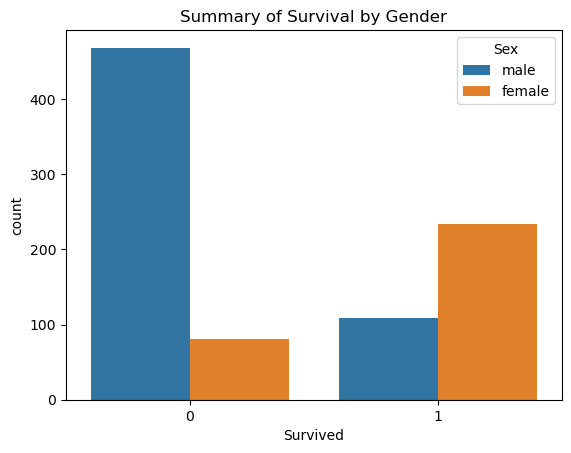

In [30]:
sns.countplot(x="Survived", data=df_train, hue='Sex')
plt.title('Summary of Survival by Gender')
plt.show()

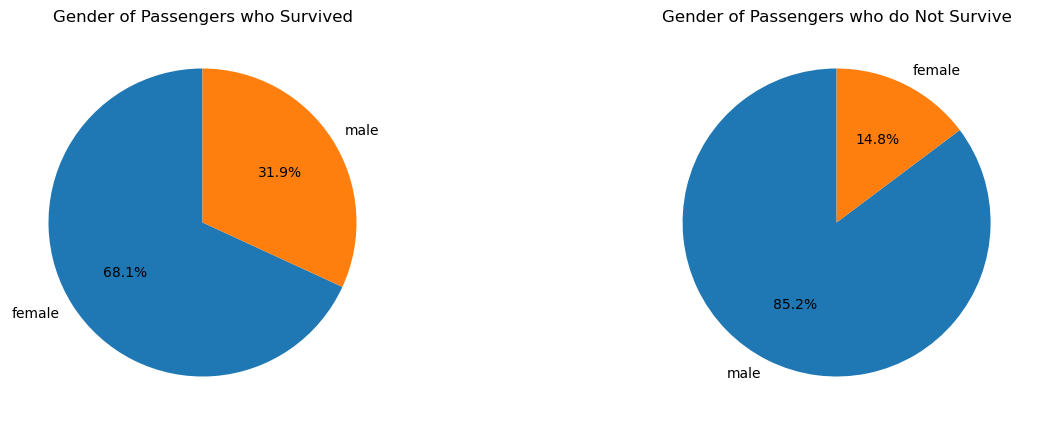

In [31]:
# Count number of male and female passengers who survived
survived = df_train.loc[df_train['Survived'] == 1, 'Sex'].value_counts()

# Count number of male and female passengers who  did NOT survive
notSurvived = df_train.loc[df_train['Survived'] == 0, 'Sex'].value_counts()

fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].pie(survived, labels=survived.index, autopct='%1.1f%%', startangle=90)
ax[0].set_title('Gender of Passengers who Survived')

ax[1].pie(notSurvived, labels=notSurvived.index, autopct='%1.1f%%', startangle=90)
ax[1].set_title('Gender of Passengers who do Not Survive')
plt.show()

In [32]:
# check for duplicates
df_train.duplicated().sum()

0

## Review Null Values in dataset

In [33]:
# check for null values
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [34]:
# review embarked feature  null values
df_train['Embarked'].value_counts(dropna=False)

S      644
C      168
Q       77
NaN      2
Name: Embarked, dtype: int64

In [35]:
# replace Embarked null values with the most common (S - Southampton)
df_train['Embarked'] = df_train['Embarked'].fillna(df_train['Embarked'].mode()[0])
df_train['Embarked'].value_counts(dropna=False)

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [36]:
# Review Cabin Feature null values
round((df_train['Cabin'].isnull().sum() / df_train.shape[0]) * 100, 2)

77.1

In [37]:
# As null value in Cabin Feature account fot 77% of data
# drop column  due to large amount of missing data

df_train = df_train.drop(['Cabin'], axis=1)
print(df_train.shape)
df_train.head()

(891, 11)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


<AxesSubplot:ylabel='Frequency'>

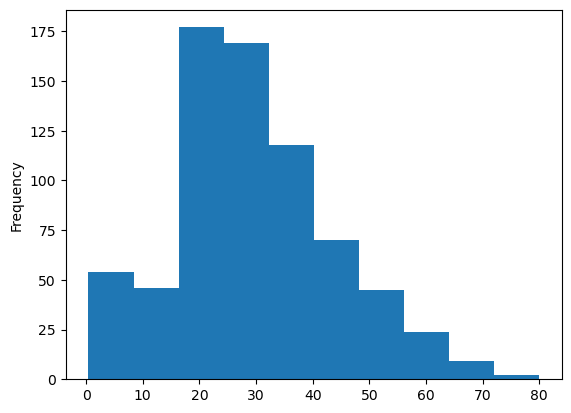

In [38]:
# Review Age feature null values
df_train['Age'].plot(kind='hist')


In [39]:
# # replace with median
df_train['Age'] = df_train['Age'].fillna(df_train['Age'].median())
df_train['Age'].isnull().sum() 

0

<AxesSubplot:ylabel='Frequency'>

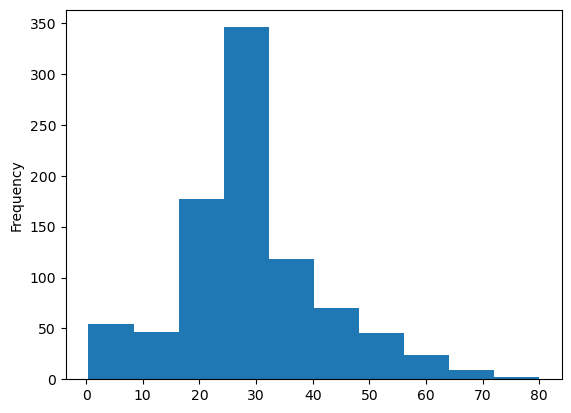

In [20]:
df_train['Age'].plot(kind='hist')

In [40]:
# Drop Age column as median replacement skews  the age distribution significantly
# Drop columns which do not relate to survival prediction (PassengerId, Name, Ticket)
df_train = df_train.drop(['Age','PassengerId', 'Name', 'Ticket'], axis=1)
print(df_train.shape)
df_train.head()

(891, 7)


,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,0,3,male,1,0,7.2500,S
1,1,1,female,1,0,71.2833,C
2,1,3,female,0,0,7.9250,S
3,1,1,female,1,0,53.1000,S
4,0,3,male,0,0,8.0500,S


# Data Preparation

In [45]:
# encode Sex Feature
label_encoder = preprocessing.LabelEncoder()
df_train['Gender'] =  label_encoder.fit_transform(df_train['Sex'])
df_train['Gender'].unique()
df_train.head()

# 1 == Male
# 0 == Female

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,Gender
0,0,3,male,1,0,7.2500,S,1
1,1,1,female,1,0,71.2833,C,0
2,1,3,female,0,0,7.9250,S,0
3,1,1,female,1,0,53.1000,S,0
4,0,3,male,0,0,8.0500,S,1


In [46]:
# encode Embarked Feature
df_train['EmbarkedCode'] =  label_encoder.fit_transform(df_train['Embarked'])
df_train['EmbarkedCode'].unique()
df_train.head()

# Cherbourg (C) == 0
# Queenstown (Q) == 1
# Southampton (S) == 2


,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,Gender,EmbarkedCode
0,0,3,male,1,0,7.2500,S,1,2
1,1,1,female,1,0,71.2833,C,0,0
2,1,3,female,0,0,7.9250,S,0,2
3,1,1,female,1,0,53.1000,S,0,2
4,0,3,male,0,0,8.0500,S,1,2


In [48]:
# Drop Sex and Embarked columns

df_train = df_train.drop(['Sex','Embarked'], axis=1)
print(df_train.shape)
df_train.head()


(891, 7)


,Survived,Pclass,SibSp,Parch,Fare,Gender,EmbarkedCode
0,0,3,1,0,7.2500,1,2
1,1,1,1,0,71.2833,0,0
2,1,3,0,0,7.9250,0,2
3,1,1,1,0,53.1000,0,2
4,0,3,0,0,8.0500,1,2


In [49]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Survived      891 non-null    int64  
 1   Pclass        891 non-null    int64  
 2   SibSp         891 non-null    int64  
 3   Parch         891 non-null    int64  
 4   Fare          891 non-null    float64
 5   Gender        891 non-null    int32  
 6   EmbarkedCode  891 non-null    int32  
dtypes: float64(1), int32(2), int64(4)
memory usage: 41.9 KB
